In [1]:
import tensorflow
(x_train,y_train),(x_test,y_test) = tensorflow.keras.datasets.mnist.load_data()

In [2]:
print(x_train.shape)

(60000, 28, 28)


In [3]:
x_train= x_train.reshape(x_train.shape[0],28*28).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28*28).astype('float32')/255

y_train = tensorflow.keras.utils.to_categorical(y_train,10)
y_test = tensorflow.keras.utils.to_categorical(y_test,10)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [5]:
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

def createModel(op):
    model = tensorflow.keras.models.Sequential()
    model.add(layers.Input(shape=(28*28,)))
    model.add(layers.Dense(128,activation='relu',kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=op,metrics=['accuracy'])
    history=model.fit(x_train,y_train,validation_split=0.2,batch_size=64,epochs=25,callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)],verbose=0)
    return history


In [6]:
history1=createModel('adam')
history2=createModel('SGD')
history3=createModel('Adagrad')

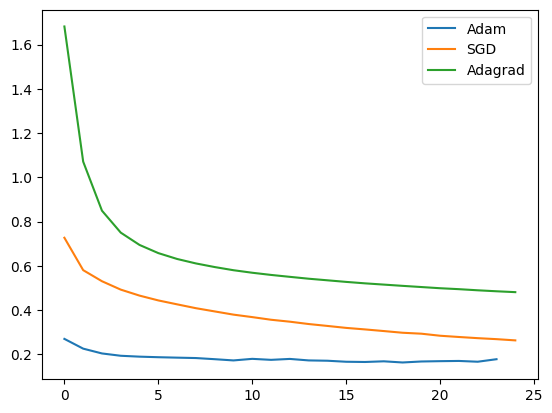

In [7]:
import matplotlib.pyplot as plt

plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['Adam','SGD','Adagrad'])

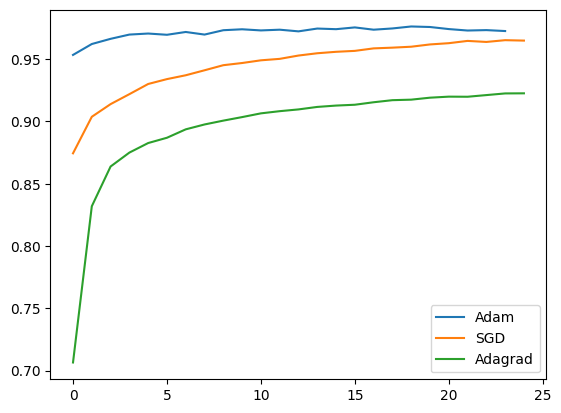

In [8]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['Adam','SGD','Adagrad'])

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [11]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(784,)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.01)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

history4=model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

c:\Users\kamat\.conda\envs\sem5\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5145 - loss: 1.7278
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8571 - loss: 0.5586
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8866 - loss: 0.4102
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8995 - loss: 0.3544
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9085 - loss: 0.3204
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9155 - loss: 0.2989
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9186 - loss: 0.2846
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9232 - loss: 0.2727
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9266 - loss: 0.2598
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9280 - loss: 0.2531


In [17]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(784,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

optimizer = SGD(learning_rate=0.01, clipvalue=0.1)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

history5=model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5326 - loss: 1.6529
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8683 - loss: 0.5216
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8913 - loss: 0.3936
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9033 - loss: 0.3428
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9098 - loss: 0.3215
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9143 - loss: 0.2966
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9189 - loss: 0.2817
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9247 - loss: 0.2688
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9274 - loss: 0.2523
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9304 - loss: 0.2429


In [18]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Without Gradient Clipping:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model2.evaluate(x_test, y_test, verbose=0)
print('With Gradient Clipping:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Without Gradient Clipping:
Test loss: 0.23780302703380585
Test accuracy: 0.9315000176429749
Without Gradient Clipping:
Test loss: 0.23508283495903015
Test accuracy: 0.9343000054359436


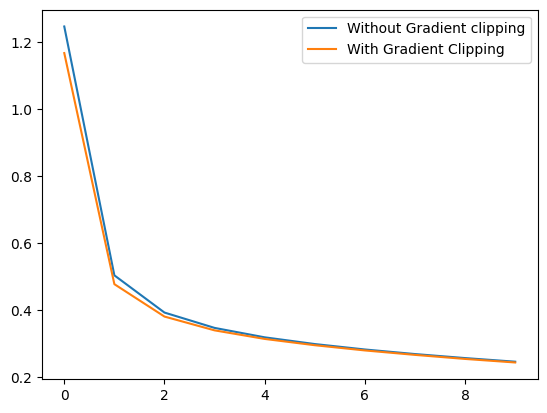

In [19]:
plt.plot(history4.history['loss'])
plt.plot(history5.history['loss'])
plt.legend(['Without Gradient clipping','With Gradient Clipping'])
plt.show()

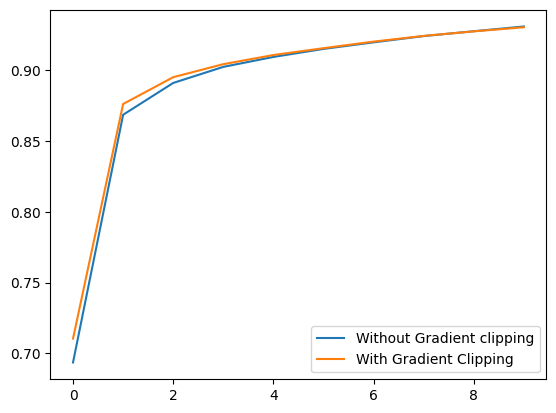

In [20]:
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.legend(['Without Gradient clipping','With Gradient Clipping'])
plt.show()